<a href="https://colab.research.google.com/github/DT22179/Book-Recommendation-System/blob/main/Book_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are
today unavoidable in our daily online journeys.

In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).**Recommender systems** are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from
competitors. The main objective is to create a book recommendation system for users.


**Dataset Overview**

The Book-Crossing dataset comprises 3 files - 

● Users : Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

● Books : Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.

● Ratings : Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
file_path = "/content/drive/MyDrive/AlmaBetter/Capstone Project/Unsupervised Learning - Capstone Project/Data"

In [ ]:
users_df = pd.read_csv(file_path + "/Users.csv")
books_df = pd.read_csv(file_path + "/Books.csv")
ratings_df = pd.read_csv(file_path + "/Ratings.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
print(users_df.shape)
print(ratings_df.shape)
print(books_df.shape)

(278858, 3)
(1149780, 3)
(271360, 8)


**-------------------------------------------------------------------------DATA PREPROCESSING---------------------------------------------------------------**

**Books DataFrame**

In [ ]:
books_df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [ ]:
books_df['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

*We can observe that Year-Of-Publication have some misleading values and Publisher values for those column is replaced by Image-URL. Author have publishing year*

In [ ]:
books_df[books_df['Year-Of-Publication'] == 'Gallimard']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [ ]:
books_df[books_df['Year-Of-Publication'] == 'DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [ ]:
## Replacing Year-Of-Publication misleading values to actual year it was published which is given in Book-Author column
books_df.loc[(books_df['Year-Of-Publication'] == 'DK Publishing Inc'), 'Year-Of-Publication'] = 2000
books_df.loc[(books_df['Year-Of-Publication'] == 'Gallimard'), 'Year-Of-Publication'] = 2003

In [ ]:
books_df['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [ ]:
books_df['Year-Of-Publication'] = books_df['Year-Of-Publication'].astype('int')

In [ ]:
books_df['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984,    0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, 2012, 2006, 1909, 2008, 1378,
       1919, 1922, 1897, 2024, 1376, 2037])

*116 unique values present. But now too there is misleading values. Such as year is 0 or even year is 2024,2038, etc. Let's handle this now.*

In [ ]:
books_df.loc[(books_df['Year-Of-Publication'] == 0) | (books_df['Year-Of-Publication'] > 2022)].nunique()

ISBN                   4631
Book-Title             4485
Book-Author            3314
Year-Of-Publication       7
Publisher              1002
Image-URL-S            4624
Image-URL-M            4624
Image-URL-L            4624
dtype: int64

*Thus, there are total 7 years where value is either 0 or greater than 2022. Let's change that value with np.nan*

In [ ]:
books_df.loc[(books_df['Year-Of-Publication'] == 0) | (books_df['Year-Of-Publication'] > 2022), 'Year-Of-Publication'] = np.nan

In [ ]:
books_df.loc[(books_df['Year-Of-Publication'] == 0) | (books_df['Year-Of-Publication'] > 2022)].nunique()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [ ]:
books_df.isna().sum()

ISBN                      0
Book-Title                0
Book-Author               1
Year-Of-Publication    4631
Publisher                 2
Image-URL-S               0
Image-URL-M               0
Image-URL-L               3
dtype: int64

*There are many nan values, let's replace it with the mean*

In [ ]:
books_df['Year-Of-Publication'].fillna(round(books_df['Year-Of-Publication'].mean()), inplace = True)

In [ ]:
books_df.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [ ]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


Dropping the unwanted features from books dataframe.

In [ ]:
books_df.drop(columns = ['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis = 1, inplace  = True)

In [ ]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company


In [ ]:
books_df.duplicated().any()

False

*No duplicaed values in Books dataframe*

**Users Dataframe**

In [ ]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
users_df.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

*Many null values in Age column*

In [ ]:
users_df['Age'].nunique()

165

In [ ]:
users_df['Age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

*165 unique values for Age column with many misleaging values such as 239, 103, 104 and so on. Thus, we can replace this values with the mean but before that let's handle the NaN values.*

In [ ]:
users_df['Age'].fillna(round(users_df['Age'].mean()), inplace = True)

In [ ]:
users_df.isna().sum()

User-ID     0
Location    0
Age         0
dtype: int64

*No null values now*

In [ ]:
users_df['Age'].describe()

count    278858.000000
mean         34.850164
std          11.202663
min           0.000000
25%          29.000000
50%          35.000000
75%          35.000000
max         244.000000
Name: Age, dtype: float64

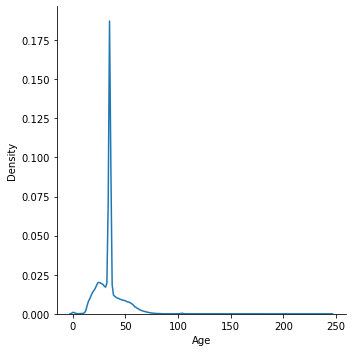

In [ ]:
sns.displot(users_df['Age'], kind='kde')

*Let's handle Age column by replacing values with mean of Age columns where age is less than 6 and greater than 75*

In [ ]:
users_df.loc[(users_df['Age'] < 6) | (users_df['Age'] > 75)]

,User-ID,Location,Age
219,220,"bogota, bogota, colombia",0.0
220,221,"palm beach, florida, usa",79.0
469,470,"indianapolis, indiana, usa",0.0
561,562,"adfdaf, australian capital territory, albania",0.0
612,613,"ankara, n/a, turkey",1.0
...,...,...,...
278301,278302,"düsseldorf, nordrhein-westfalen, germany",104.0
278317,278318,"studio city, california, usa",77.0
278348,278349,"carlin, nevada, usa",76.0
278412,278413,"kansas city, missouri, usa",76.0


In [ ]:
users_df.loc[(users_df['Age'] < 6) | (users_df['Age'] > 75), 'Age'] = 34

In [ ]:
users_df['Age'].nunique()

70

In [ ]:
users_df['Age'].unique()

array([35., 18., 17., 61., 26., 14., 25., 19., 46., 55., 32., 24., 20.,
       34., 23., 51., 31., 21., 44., 30., 57., 43., 37., 41., 54., 42.,
       50., 39., 53., 47., 36., 28., 13., 58., 49., 38., 45., 62., 63.,
       27., 33., 29., 66., 40., 15., 60., 22., 16., 65., 59., 48., 72.,
       56., 67., 52., 69., 71., 73.,  9., 64., 12., 74., 75., 68., 11.,
       70.,  8.,  7., 10.,  6.])

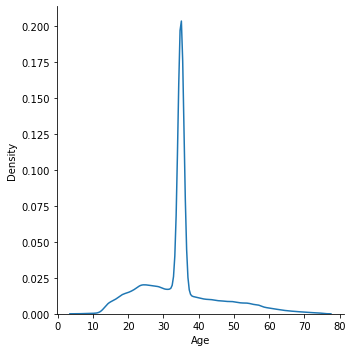

In [ ]:
sns.displot(x='Age', data=users_df, kind='kde')

In [ ]:
users_df.duplicated().any()

False

*No Duplicated records in Users Dataframe*

**Ratings Dataframe**

In [ ]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
ratings_df['Book-Rating'].nunique()

11

In [ ]:
ratings_df['Book-Rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2])

In [ ]:
ratings_df.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [ ]:
ratings_df.duplicated().any()

False

*No null or duplicated values present in a Ratings dataframe. Thus, now we can go ahead with Exploratory Data Analysis*

**-------------------------------------------------------------EXPLORATORY DATA ANALYSIS--------------------------------------------------------------**

**Books Dataframe**

In [ ]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company


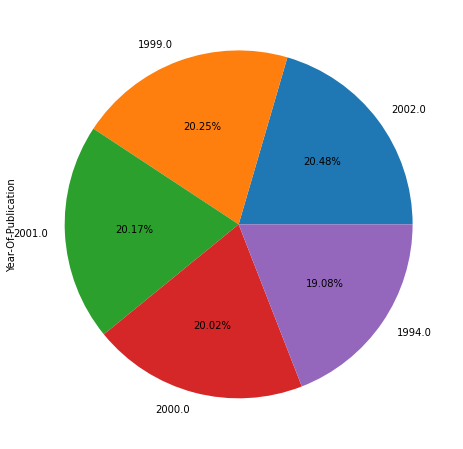

In [ ]:
plt.figure(figsize=(15,8))
books_df['Year-Of-Publication'].value_counts().head().plot(kind='pie', autopct='%1.2f%%')
plt.show()

Top 5 years with highest number of books published - 

2002 | 1999 | 2001 | 2000 | 1994

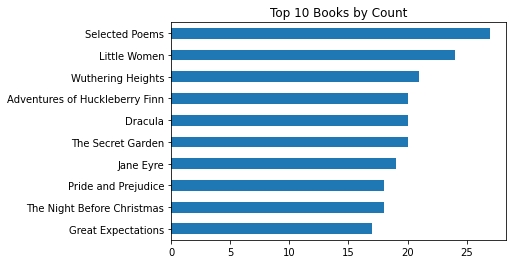

In [ ]:
books_df['Book-Title'].value_counts().head(10).sort_values().plot(kind='barh', title='Top 10 Books by Count')

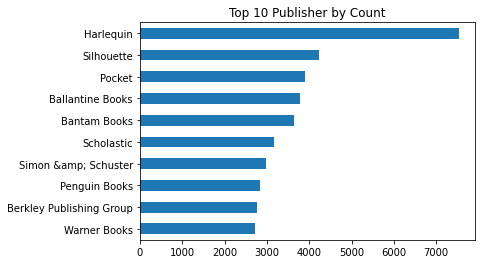

In [ ]:
books_df['Publisher'].value_counts().head(10).sort_values().plot(kind='barh', title='Top 10 Publisher by Count')

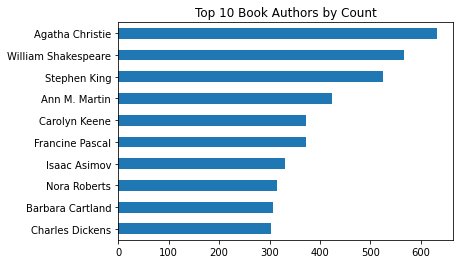

In [ ]:
books_df['Book-Author'].value_counts().head(10).sort_values().plot(kind='barh', title='Top 10 Book Authors by Count')

**Users Dataframe**

In [ ]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",35.0
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",35.0
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",35.0


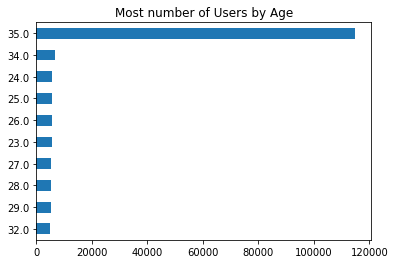

In [ ]:
users_df['Age'].value_counts().head(10).sort_values().plot(kind='barh',title='Most number of Users by Age')

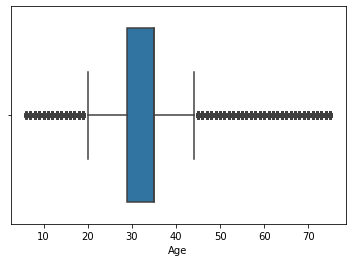

In [ ]:
sns.boxplot(x='Age', data=users_df)

*We can observe is the observation is below 20 or Above 45 then that observation is considered as an outlier*

**Ratings Dataframe**

In [ ]:
ratings_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


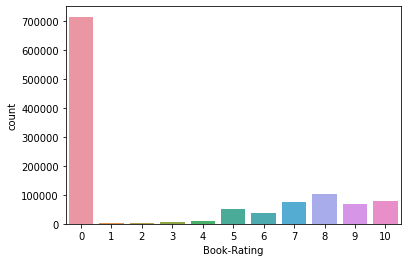

In [ ]:
sns.countplot(x='Book-Rating', data=ratings_df)

Highest rating is 8  out of 10. Which means most of the books are rated 8 by most of the users. 1 & 2 are on the lowest side.

In [ ]:
users_df['User-ID'].shape

(278858,)

In [ ]:
ratings_df['User-ID'].nunique()

105283

*We can observe in total there are 278858 users but out of them only 105283 have omly opted to give ratings for book.*

In [ ]:
ratings_df['User-ID'].shape

(1149780,)

*We can observe total ratings by users giving rate is 1149780.*

*Let's begin with building a Recommendation System.*

**Collaborative Filtering Using k - Nearest Neighbors**

Checking how many times individual user have rated the different books & also how many times individual book got ratings from different users.

In [ ]:
user_ratings_count = ratings_df['User-ID'].value_counts()

In [ ]:
user_ratings_count.describe()

count    105283.000000
mean         10.920851
std          90.562825
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max       13602.000000
Name: User-ID, dtype: float64

In [ ]:
book_ratings_count = ratings_df['ISBN'].value_counts()

In [ ]:
book_ratings_count.describe()

count    340556.000000
mean          3.376185
std          12.436252
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        2502.000000
Name: ISBN, dtype: float64

In [ ]:
user_ratings_count.quantile(q=0.99)

174.0

In [ ]:
user_ratings_count[user_ratings_count > 174]

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
9908        175
173481      175
93426       175
41227       175
181076      175
Name: User-ID, Length: 1050, dtype: int64

*We can observe that 99% of users have given total rating 29 or less times. There are 1050 such users. So let's keep a threshold of 174 for users to ensure statistical significance.*

In [ ]:
book_ratings_count.quantile(q=0.99)

36.0

In [ ]:
book_ratings_count[book_ratings_count > 26]

0971880107    2502
0316666343    1295
0385504209     883
0060928336     732
0312195516     723
              ... 
0553270222      27
0590568752      27
0140430105      27
880781210X      27
0345333756      27
Name: ISBN, Length: 5048, dtype: int64

*We can observe that 99% of the books have total numbver of rating count given by user as 26 or less. Keeping threshold for statistical significance as 26 for Books. There are 2377 such books.*

**To ensure statistical significance, users with less than 174 ratings, and books with less than 26 ratings are excluded.**

Filtering users with only 174 or more ratings.

In [ ]:
ratings_df = ratings_df[ratings_df['User-ID'].isin(user_ratings_count[user_ratings_count >= 174].index)]

In [ ]:
ratings_df

,User-ID,ISBN,Book-Rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0
...,...,...,...
1149633,276680,1884910033,0
1149634,276680,1888173408,7
1149635,276680,1888173564,8
1149636,276680,1888173572,0


Filtering books with 26 or more ratings.

In [ ]:
ratings_df = ratings_df[ratings_df['ISBN'].isin(book_ratings_count[book_ratings_count >= 26].index)]

In [ ]:
ratings_df

,User-ID,ISBN,Book-Rating
1456,277427,002542730X,10
1460,277427,0060002050,0
1465,277427,0060542128,7
1466,277427,0060913509,0
1468,277427,006092988X,0
...,...,...,...
1149616,276680,0812969812,0
1149628,276680,1573222267,0
1149629,276680,1573229083,7
1149630,276680,1573229865,0


**k - Nearest Neighbor is a popular machine learning algorithm which in this case will help us to find clusters of similar users based on common book ratings & make predictions using the average rating of top-k nearest neighbor.**

Combining **Rating** and **Book** dataframe using **ISBN** feature which is common in both.

In [ ]:
combined_book_rating_df = pd.merge(ratings_df, books_df, on='ISBN')

In [ ]:
combined_book_rating_df

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994.0,John Wiley &amp; Sons Inc
...,...,...,...,...,...,...,...
147761,261105,3518368540,0,Homo Faber,Max Frisch,1994.0,Distribooks Int'l+inc
147762,276018,3518368540,0,Homo Faber,Max Frisch,1994.0,Distribooks Int'l+inc
147763,222488,3596150655,9,Generation Golf. Eine Inspektion,Florian Illies,2002.0,Distribooks
147764,241198,3596150655,7,Generation Golf. Eine Inspektion,Florian Illies,2002.0,Distribooks


We cam drop **Book-Author** ,**Year of Publication** & **Publisher** as we will not be needing that features.

In [ ]:
combined_book_rating_df = combined_book_rating_df.drop(columns=['Book-Author', 'Year-Of-Publication', 'Publisher'], axis=1)

In [ ]:
combined_book_rating_df.head()

,User-ID,ISBN,Book-Rating,Book-Title
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...


Grouping by book titles and creating a new column for total rating count.

In [ ]:
combined_book_rating_df.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
Book-Title     0
dtype: int64

In [ ]:
combined_book_rating_df.head()

,User-ID,ISBN,Book-Rating,Book-Title
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...


In [ ]:
book_rating_count_df = (combined_book_rating_df.
                        groupby(by=['Book-Title'])['Book-Rating'].
                        count().
                        reset_index().
                        rename(columns = {'Book-Rating' : 'Total Rating Count'})
                        [['Book-Title', 'Total Rating Count']]
                        )

In [ ]:
book_rating_count_df.head()

,Book-Title,Total Rating Count
0,'Salem's Lot,14
1,10 Lb. Penalty,28
2,"14,000 Things to Be Happy About",15
3,16 Lighthouse Road,42
4,1984,78


Combining the combined_book_rating with the book_rating_count to get the total rating counts. This gives us exactly what we need to find out which books are popular and filter out the lesser-known books.

In [ ]:
bookRating_with_totalRatingCount_df =  combined_book_rating_df.merge(book_rating_count_df, on='Book-Title', how='left')

In [ ]:
bookRating_with_totalRatingCount_df.tail()

,User-ID,ISBN,Book-Rating,Book-Title,Total Rating Count
147761,261105,3518368540,0,Homo Faber,3
147762,276018,3518368540,0,Homo Faber,3
147763,222488,3596150655,9,Generation Golf. Eine Inspektion,2
147764,241198,3596150655,7,Generation Golf. Eine Inspektion,2
147765,234597,8845205118,0,Il Piccolo Principe Prince Italn,1


In [ ]:
bookRating_with_totalRatingCount_df.head()

,User-ID,ISBN,Book-Rating,Book-Title,Total Rating Count
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,83
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,83
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,83
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,83
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,83


Keeping a threshold value to get book with 26 or more ratings only. Which will be just 1% as we saw above.

In [ ]:
bookRating_with_totalRatingCount_df.describe()

,User-ID,Book-Rating,Total Rating Count
count,147766.000000,147766.000000,147766.000000
mean,140404.491629,1.963645,59.413329
std,80736.432037,3.527558,54.264728
min,254.000000,0.000000,1.000000
25%,69971.000000,0.000000,23.000000
50%,141493.000000,0.000000,40.000000
75%,212898.000000,0.000000,77.000000
max,278418.000000,10.000000,407.000000


In [177]:
popularity_threshold = 25
highly_rated_books_df = bookRating_with_totalRatingCount_df[bookRating_with_totalRatingCount_df['Total Rating Count'] > popularity_threshold]

In [178]:
highly_rated_books_df.head(10)

,User-ID,ISBN,Book-Rating,Book-Title,Total Rating Count
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,83
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,83
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,83
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,83
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,83
5,16795,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,83
6,24194,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,83
7,25981,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,83
8,26535,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,83
9,28204,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,83


In [179]:
highly_rated_books_df.tail(10)

,User-ID,ISBN,Book-Rating,Book-Title,Total Rating Count
147650,265115,0553584480,0,The Face,34
147651,270820,0553584480,10,The Face,34
147690,91203,014012389X,10,Love in the Time of Cholera,29
147691,107301,014012389X,0,Love in the Time of Cholera,29
147692,131402,014012389X,0,Love in the Time of Cholera,29
147693,149908,014012389X,0,Love in the Time of Cholera,29
147694,155014,014012389X,8,Love in the Time of Cholera,29
147695,225986,014012389X,0,Love in the Time of Cholera,29
147696,238864,014012389X,5,Love in the Time of Cholera,29
147697,251394,014012389X,0,Love in the Time of Cholera,29


In [180]:
highly_rated_books_df.shape

(102466, 5)

In [181]:
highly_rated_books_df['Book-Title'].nunique()

1901

*We have 1901 highly rated unqiue books.*

In [182]:
highly_rated_books_df['User-ID'].nunique()

1039

In [183]:
highly_rated_books_df['ISBN'].nunique()

2440

**k - Nearest Neigbor Algorithm**

k Nearest Neighbors (kNN) is a simple ML algorithm for classification and regression.kNN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using kNN algorithm. But one issue with kNN is that it is quiet slow.

**Why kNN is slow?**
 
 The reason kNN is slow is that - 

It as a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.
